In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

In [2]:
# Note: you may import library functions from numpy or scipy to compute distances
from scipy.spatial import distance
import scipy
def oracle(x, landmarks):
    # YOUR CODE HERE
    s=np.shape(landmarks)[0]
    distances=np.zeros(s)
    i=0
    while i<s:
    #for i in range(s):
        distances[i]=np.linalg.norm(x-landmarks[i])
        i=i+1
    prod=distances[np.argsort(distances[0])]*distances[np.argsort(distances)[-1]]
    return prod

def make_dataset_regression(size=100, complexity=2, ndim=3, return_landmarks=False):
    # YOUR CODE HERE
    y=np.zeros(size,dtype=float)
    data_mtx=np.zeros([size,ndim],dtype=float)
    landmarks=np.zeros([complexity,ndim],dtype=float)
    
    for i in range(complexity):
        for j in range(ndim):
            landmarks[i][j]=np.random.uniform(0,1)
    for k in range(size):
        for l in range(ndim):
            data_mtx[k][l]=np.random.uniform(0,1)
        y[k]=oracle(data_mtx[k],landmarks)
    
    if return_landmarks==True:
        return data_mtx,y,landmarks
    else:
        return data_mtx,y
    
def make_2d_grid_dataset_regression(size, landmarks):
    # YOUR CODE HERE
    s=int(np.sqrt(size))
    y=np.zeros(round(s*s),dtype=float)
    m=np.linspace(0,1,num=s)
    data_mtx = np.array(np.meshgrid(m,m)).T.reshape(-1,2)
    l=len(y)
    j=0
    while j<l:
    
        y[j]=oracle(data_mtx[j],landmarks)
        j+=1
    return data_mtx,y
    
def oracle_classification(X, pos_landmarks, neg_landmarks):
    # YOUR CODE HERE
    n=np.shape(X)[0]
    y=np.zeros(n,dtype=float)
    
    i=0
    while i<n:
    
        q=oracle(X[i],pos_landmarks)
        r=oracle(X[i],neg_landmarks)
        if q<=r:
            y[i]=1
        else:
            y[i]=0
        i+=1
    return y

def make_dataset_classification(size=100, complexity=2, ndim=3, return_landmarks=False):
    # YOUR CODE HERE
    data_mtx=np.zeros([size,ndim],dtype=float)
    for k in range(size):
        for l in range(ndim):
            data_mtx[k][l]=np.random.uniform(0,1)
    
    
    pos_landmarks=np.zeros([complexity,ndim],dtype=float)
    neg_landmarks=np.zeros([complexity,ndim],dtype=float)
    k=0
    while k<complexity:
    
        for l in range(ndim):
            pos_landmarks[k][l]=np.random.uniform(0,1)
            neg_landmarks[k][l]=np.random.uniform(0,1)
    
        k+=1
        
    y=oracle_classification(data_mtx, pos_landmarks, neg_landmarks)
        
    if return_landmarks==True:
        return data_mtx,y,pos_landmarks, neg_landmarks
    else:
        return data_mtx,y


    
def make_2d_grid_dataset_classification(size, pos_landmarks, neg_landmarks):
    # YOUR CODE HERE
    a=np.sqrt(size)
    m=np.linspace(0,1,num=int(a),endpoint=False)
    
    data_mtx = np.array(np.meshgrid(m,m)).T.reshape(-1,2)
    y=oracle_classification(data_mtx,pos_landmarks,neg_landmarks)
    return data_mtx, y


    
def plot_2d_classification(X_test, y_test, preds, pos_landmarks, neg_landmarks):
    # YOUR CODE HERE
    g = []
    p = []
    fig, ax = plt.subplots (nrows = 1, ncols= 3, figsize = (9, 4))
    
    for c,d in X_test:
        g.append(c)
        p.append(d) 
    len_preds=len(preds)
    acc= np.sum(y_test== preds) / len_preds
    ax[0].scatter(g, p, c= preds, cmap = 'bwr', alpha = 0.2) 
    ax[0].set_title('Prediction')
    
    pos_len=len(pos_landmarks)
    idx=0
    while idx<pos_len:
    
        ax[0].plot(pos_landmarks[idx][0], pos_landmarks[idx][1], marker = 'd', markersize = 10, color = 'blue') 
        ax[0].plot(neg_landmarks [idx][0], neg_landmarks[idx][1], marker = 'd', markersize = 10, color = 'red')
        idx+=1
    ax[1].scatter(g, p, c= y_test, cmap = 'bwr', alpha= 0.2) 
    ax[1].set_title('Truth')
    
    idx=0
    while idx<pos_len:

    
        ax[1].plot(pos_landmarks [idx][0], pos_landmarks[idx][1], marker = 'd', markersize= 10, color= 'blue') 
        ax[1].plot(neg_landmarks [idx][0], neg_landmarks[idx][1], marker = 'd', markersize = 10, color = 'red')
        idx+=1
        
    ax[2].scatter(g, p, c=y_test, cmap = 'gray', alpha = 0.3)
    ax[2].scatter(g, p, c= preds, cmap = 'bwr', alpha=0.2) 
    ax[2].set_title(f' Comparison Acc:{(acc,3)}')
    
    
    idx=0
    while idx<pos_len:
    
        ax[2].plot(pos_landmarks [idx][0], pos_landmarks [idx][1], marker = 'd', markersize = 10, color = 'blue') 
        ax[2].plot(neg_landmarks [idx][0], neg_landmarks[idx][1], marker = 'd', markersize = 10, color = 'red')
        idx+=1
    
def plot_2d_regression(X_test, y_test, preds, landmarks):
    # YOUR CODE HERE
    g = [] 
    p = []
    correlation=scipy.stats.pearsonr(y_test, preds)
    fig, ax = plt.subplots(nrows = 1, ncols= 2, figsize = (8, 3))
    
    for c,d in X_test:
        g.append(c)
        p.append(d)
    
     
    ax[0].scatter(g, p, c= preds, cmap = 'hot_r')
    ax[0].set_title(f'Prediction cc {round(correlation[0],3)}') 
    l=len(landmarks)
    
    idx=0
    while idx<l:
    
        ax[0].plot(landmarks [idx][0], landmarks[idx][1], marker = 'd', markersize = 10, color= 'black') 
        idx+=1


    ax[1].scatter(g, p, c= y_test, cmap = 'hot_r') 
    ax[1].set_title('Truth')
    
    idx=0
    while idx<l:
    
        ax[1].plot(landmarks [idx][0], landmarks [idx][1], marker = 'd', markersize = 10, color = 'black')
        idx+=1
    

The aim of the following functions is to provide the implementations for the loss functions and the activation functions to be used in the generalized perceptron algorithm. In the following, the inputs y represent prediction(s), t the true value(s) and x the pre-activation value(s). These inputs can be scalars or vectors (both row or column vectors), that is these functions should work for inputs that are scalar or vectors.

In [3]:
def mse_loss(y, t):
    # YOUR CODE HERE
    
    loss_mse=np.square(np.subtract(t,y)).mean()
    return loss_mse
    
def mse_loss_grad(y, t):
    # YOUR CODE HERE
    #return np.sum(np.subtract(t,y))*(2/len(y))
    #2*np.sum(np.subtract(t,y))/len(y)
    y=np.array(y)
    t=np.array(t)
    mse_grad=2*np.subtract(t,y)/y.size
    return mse_grad
    
def binary_crossentropy_loss(y, t):
    # YOUR CODE HERE
    
    a=(1-t)*np.log(1-y+1e-7)
    b=t*np.log(y+1e-7)
    final_loss=-np.mean(a+b)
    return final_loss
    
def binary_crossentropy_loss_grad(y, t):
    # YOUR CODE 
    epsilon=1e-10
    bin_grad=(t-y)/(t*(1-t)+epsilon)
    return bin_grad

    
def linear_activation(x):
    # YOUR CODE HERE
    return x
    
def linear_activation_grad(x):
    # YOUR CODE HERE
    return 1
    
def logistic_activation(x):
    # YOUR CODE HERE
    
    logistics=1/(1 + np.exp(-x))
    return logistics
    
def logistic_activation_grad(x):
    # YOUR CODE HERE
    l=logistic_activation(x)
    logistic_grad=l*(1-l) 
    return logistic_grad
    
def relu_activation(x, alpha=.05):
    # YOUR CODE HERE
    
    relu=np.maximum(alpha*x,x)
    return relu

def relu_activation_grad(x, alpha=.05):
    # YOUR CODE HERE
    return np.where(x>0, 1, alpha)

The aim of the following functions is to train artificial neural network type of classifiers and regressors. The classification is always intended as binary classification. Here I have written my own implementation for the cases of the perceptron with backpropagation rule. This implementation is more general and can accept in input arbitrary activation and loss functions. The perceptron is always assumed to have a single output unit.

In the following perceptron_model = (w, b, activation_func, activation_func_grad, loss, loss_grad), that is the perceptron model is a 6-tuple containing the weight vector w, the bias scalar b, the activation function activation_func, the derivative of the activation function activation_func_grad, the loss function loss and the derivative of the loss function loss_grad.

a) perceptron_model = init_perceptron(in_dim, activation_func, activation_func_grad, loss, loss_grad, init_size=1e-3) that takes in input a desired integer input dimension in_dim, the desired activation and loss functions and a desired float size init_size. This function initializes the perceptron model with random values. The weight vector and the bias are initialised with values in the range (-init_size, +init_size). The vector w has dimensionality equal to in_dim.

b) y or (y,h) = forward_perceptron(x, perceptron_model, return_pre_activation=False) that takes in input a vector x and a model perceptron_model and returns the output prediction according to the perceptron algorithm. If the flag return_pre_activation is set to True then the output is a 2-tuple where the first element is the predicted output and the second element is the pre-activation value.

c) perceptron_model = update_perceptron(x, t, learning_rate, perceptron_model) that takes in input a vector x, a target value t, a learning rate float value of learning_rate and a model perceptron_model and returns an updated model according to the perceptron algorithm.

d) perceptron_model = fit_perceptron(X_train, y_train, activation_func, activation_func_grad, loss, loss_grad, learning_rate, max_n_iter=1000, verbose=False) that takes in input a data matrix X_train a target vector y_train, the desired activation and loss functions, a learning rate float value of learning_rate, a maximum number of iterations of max_n_iter and returns a fit perceptron model according to the perceptron algorithm. If the flag verbose is set to True then every 100 iterations the loss is computed on the training data set and its value is printed to screen (this is useful to check that the loss is decreasing as training is progressing).

e) scores = score_perceptron(X_test, perceptron_model) that takes in input a data matrix X_test, a fit perceptron model perceptron_model and returns a score vector scores containing real values such that larger positive values indicate a preference for the positive class and viceversa for negative values.

f) preds = predict_perceptron(X_test, perceptron_model) that takes in input a data matrix X_test, a fit perceptron model perceptron_model and returns a prediction vector preds containing values 1 when predicting the positive class and 0 when predicting the negative class.

In [4]:
def init_perceptron(in_dim, activation_func, activation_func_grad, loss, loss_grad, init_size=1e-3):
    # YOUR CODE HERE
    weights = np.zeros(in_dim)
    i=0
    while i<in_dim:
    
            weights[i]=np.random.uniform(-init_size,init_size)
            i+=1
    bias=np.random.uniform(-init_size,init_size)
    perceptron_model=(weights,bias,activation_func,activation_func_grad,loss,loss_grad)
    return perceptron_model
    

def forward_perceptron(x, perceptron_model, return_pre_activation=False):
    # YOUR CODE HERE
    b1=perceptron_model[1]
    w1=perceptron_model[0]
    
    activation_func=perceptron_model[2]
    d=np.dot(w1,x)+b1
    y=activation_func(d)
    if return_pre_activation==True:
        return (y,d)
    return y
        
    
def update_perceptron(x, t, learning_rate, perceptron_model):
    # YOUR CODE HERE
    weight=perceptron_model[0]
    bias=perceptron_model[1]
    activation_func=perceptron_model[2]
    activation_func_grad=perceptron_model[3]
    loss=perceptron_model[4]
    loss_grad=perceptron_model[5]
    y,h=forward_perceptron(x,perceptron_model,return_pre_activation=True)
    
    e=loss_grad(y,t)
    m=activation_func_grad(y)
    dl=e*m
    weight=weight+learning_rate*dl*x
    bias=bias+learning_rate*dl
    perceptron=(weight,bias,activation_func,activation_func_grad,loss,loss_grad)
    return perceptron
    
def fit_perceptron(X_train, y_train, activation_func, activation_func_grad, loss, loss_grad, learning_rate, max_n_iter=1000, verbose=False):
    # YOUR CODE HERE
    dim=np.shape(X_train)[1]
    perceptron=init_perceptron(dim, activation_func, activation_func_grad, loss, loss_grad, init_size=1e-3)
    i=0
    t=np.shape(X_train)[0]
    while i<max_n_iter:
    
        if verbose==True and i%100==0:
            p=predict_perceptron(X_train,perceptron)
            e=loss(p,y_train)
            print('LOSS is:',e)
        i+=1
        for k in range(t):
            perceptron=update_perceptron(X_train[k], y_train[k], learning_rate, perceptron)
    return perceptron
                    
    
def score_perceptron(X_test, perceptron_model):
    # YOUR CODE HERE
    n=np.shape(X_test)[0]
    pt=np.zeros(n,dtype=float)
    i=0
    while i<n:
    
        m,pt[i]=forward_perceptron(X_test[i],perceptron_model,return_pre_activation=True)
        i+=1
    return pt
    
def predict_perceptron(X_test, perceptron_model):
    # YOUR CODE HERE
    pt=score_perceptron(X_test, perceptron_model)
    n=np.shape(X_test)[0]
    l=len(pt)
    predict_per=np.zeros(n)
    j=0
    while j<l:
    
        if pt[j]>=0:
            predict_per[j]=1
        else:
            predict_per[j]=0
        j+=1
    return predict_per

/var/folders/39/9qjxsvtx70b08fl151rflxbh0000gn/T/ipykernel_93622/2045021039.py:42: RuntimeWarning: overflow encountered in exp
  logistics=1/(1 + np.exp(-x))


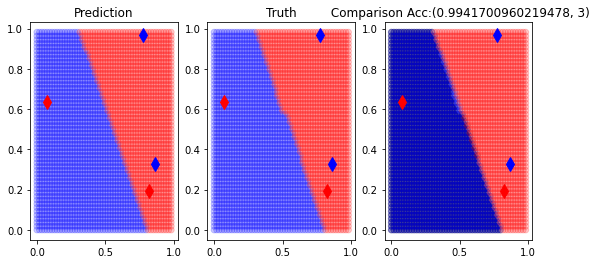

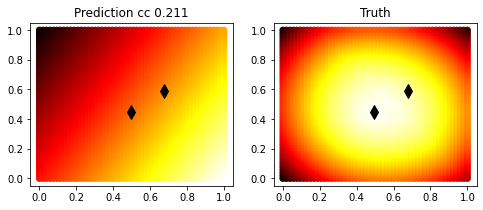

In [5]:
# classification
data, y, pos_landmarks, neg_landmarks = make_dataset_classification(size=300, complexity=2, ndim=2, return_landmarks=True)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=.3)
X_test, y_test = make_2d_grid_dataset_classification(3000, pos_landmarks, neg_landmarks)

perceptron_model = fit_perceptron(X_train, y_train, 
                                  logistic_activation, logistic_activation_grad, 
                                  binary_crossentropy_loss, binary_crossentropy_loss_grad, 
                                  learning_rate=1e-2, verbose=False)
preds = predict_perceptron(X_test, perceptron_model)
plot_2d_classification(X_test, y_test, preds, pos_landmarks, neg_landmarks)


# regression
data, y, landmarks = make_dataset_regression(size=300, complexity=2, ndim=2, return_landmarks=True)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=.3)
X_test, y_test = make_2d_grid_dataset_regression(3000, landmarks)

perceptron_model = fit_perceptron(X_train, y_train, 
                                  relu_activation, relu_activation_grad, 
                                  mse_loss, mse_loss_grad, 
                                  learning_rate=1e-2, verbose=False)
preds = score_perceptron(X_test, perceptron_model)
plot_2d_regression(X_test, y_test, preds, landmarks)